Import and read file as df_nba

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_nba = pd.read_csv('datasets/nba_final.csv')

## Preview dataset

In [2]:
df_nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salario_2022/2023,Weight,Height
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,6.0,0.9,0.6,0.5,1.1,1.9,9.2,2840160,101.0,6.80
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,11.5,2.3,0.9,1.1,1.9,2.3,8.6,17926829,119.0,6.11
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,9.2,3.2,1.2,0.8,2.5,2.8,20.4,30351780,115.0,6.90
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,2.1,1.1,0.3,0.3,0.7,1.7,7.9,3918360,97.0,6.50
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,4.8,1.3,0.6,0.6,0.8,1.9,9.0,1017784,97.0,7.00


## Dataset overview

In [3]:
df_nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salario_2022/2023,Weight,Height
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02,539.000000,539.000000
mean,25.727273,48.040816,22.820037,19.796846,3.348980,7.104638,0.463258,0.990538,2.782560,0.315306,...,3.543043,2.068831,0.609647,0.382375,1.103711,1.688126,9.121336,7.426766e+06,97.087460,6.536294
std,4.290326,24.650686,27.295285,9.544958,2.436261,4.956779,0.109669,0.872442,2.244579,0.137108,...,2.347046,1.933079,0.398533,0.384414,0.826909,0.792206,6.842216,1.027708e+07,10.367558,0.279552
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.849000e+03,72.000000,5.110000
25%,23.000000,30.500000,1.000000,12.450000,1.600000,3.400000,0.416500,0.300000,1.000000,0.281000,...,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.150000,1.017784e+06,90.000000,6.350000
50%,25.000000,54.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,0.342000,...,3.000000,1.400000,0.600000,0.300000,0.900000,1.600000,7.000000,2.792640e+06,97.000000,6.600000
75%,28.500000,68.000000,46.500000,28.350000,4.500000,9.450000,0.506000,1.500000,4.100000,0.385000,...,4.500000,2.750000,0.800000,0.500000,1.500000,2.200000,12.100000,9.015000e+06,104.000000,6.703793
max,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,...,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000,4.807001e+07,128.000000,7.200000


## Best player per position

In [4]:
def top_player_points(df):
    df = df.groupby('Pos').apply(lambda x: x.sort_values('PTS', ascending=False).head(1)).reset_index(drop=True)

    # Gráfico de barras para os principais 5 jogadores por 
    fig, ax = plt.subplots(figsize=(10, 6))

    for position, group in df.groupby('Pos'):
        ax.bar(group['Player'], group['PTS'], label=f"{position} - PTS: {group['PTS'].values[0]}, AST: {group['AST'].values[0]}, TRB: {group['TRB'].values[0]}")

    ax.set_xlabel('Jogadores')
    ax.set_ylabel('Pontos (PTS)')
    ax.set_title('Principais jogadores por posição em termos de pontos (PTS), assistências (AST) e rebotes (TRB)')
    ax.legend()
    plt.show()

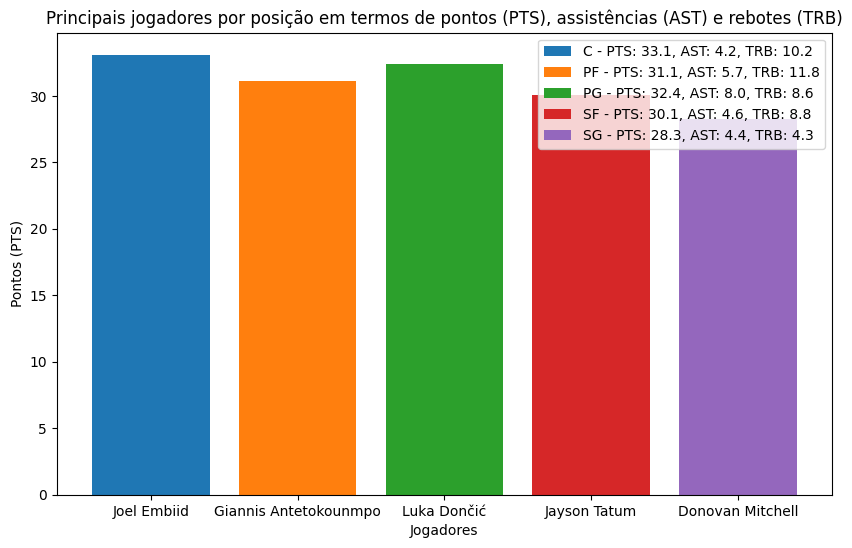

In [5]:
top_player_points(df_nba)

In [6]:
def top_player_assits(df):
    df = df.groupby('Pos').apply(lambda x: x.sort_values('AST', ascending=False).head(1)).reset_index(drop=True)

    # Gráfico de barras para os principais jogadores por posição em termos de assistências
    fig, ax = plt.subplots(figsize=(10, 6))

    for position, group in df.groupby('Pos'):
        ax.bar(group['Player'], group['AST'], label=f"{position} - PTS: {group['PTS'].values[0]}, AST: {group['AST'].values[0]}, TRB: {group['TRB'].values[0]}")

    ax.set_xlabel('Jogadores')
    ax.set_ylabel('Assistências (AST)')
    ax.set_title('Principais jogadores por posição em termos de assistências (AST)')
    ax.legend()
    plt.show()

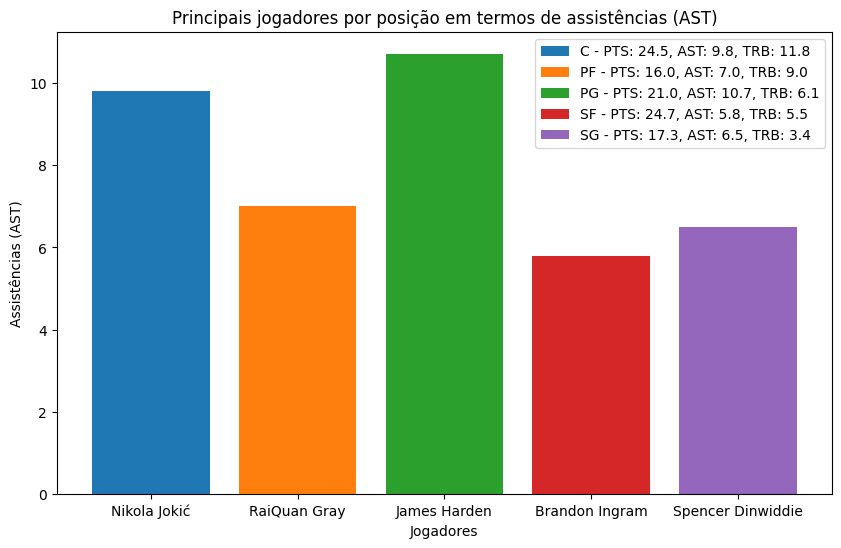

In [7]:
top_player_assits(df_nba)

In [8]:
def top_player_rebounds(df):
    df = df.groupby('Pos').apply(lambda x: x.sort_values('TRB', ascending=False).head(1)).reset_index(drop=True)

    # Gráfico de barras para os principais jogadores por posição em termos de rebotes
    fig, ax = plt.subplots(figsize=(10, 6))

    for position, group in df.groupby('Pos'):
        ax.bar(group['Player'], group['TRB'], label=f"{position} - PTS: {group['PTS'].values[0]}, AST: {group['AST'].values[0]}, TRB: {group['TRB'].values[0]}")

    ax.set_xlabel('Jogadores')
    ax.set_ylabel('Rebotes (TRB)')
    ax.set_title('Principais jogadores por posição em termos de rebotes (TRB)')
    ax.legend()
    plt.show()

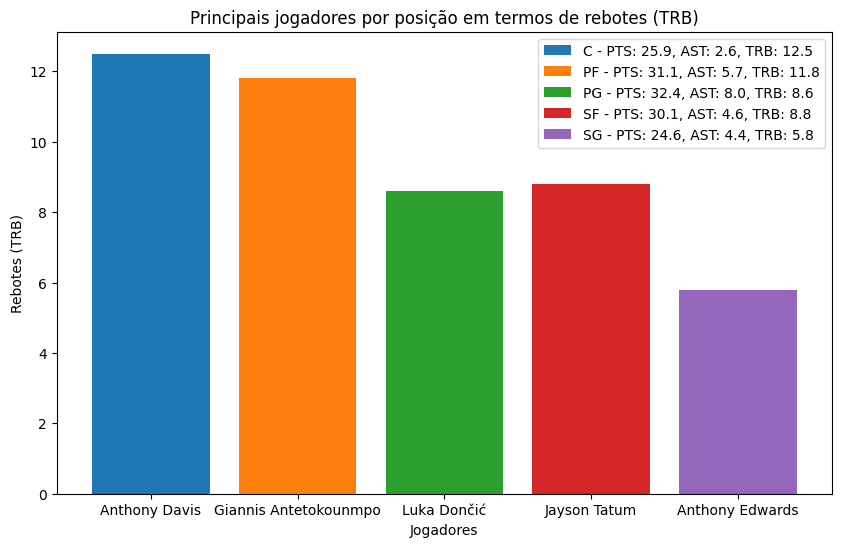

In [9]:
top_player_rebounds(df_nba)

## Top 10 salaries

In [10]:
def top10_highest_salary(df):
    df = df.sort_values(by=['Salario_2022/2023'], ascending=False).head(10)
    
    # Multiplicar os valores do eixo y por 1.000.000
    df['Salario_2022/2023'] = df['Salario_2022/2023']
    
    # Gráfico de barras para os 10 jogadores com o salário mais alto
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(df['Player'], df['Salario_2022/2023'])

    ax.set_xlabel('Jogadores')
    ax.set_ylabel('Salário em 10^7$ (USD)')
    ax.set_title('10 jogadores com o salário mais alto')
    plt.xticks(rotation=90)
    plt.show()

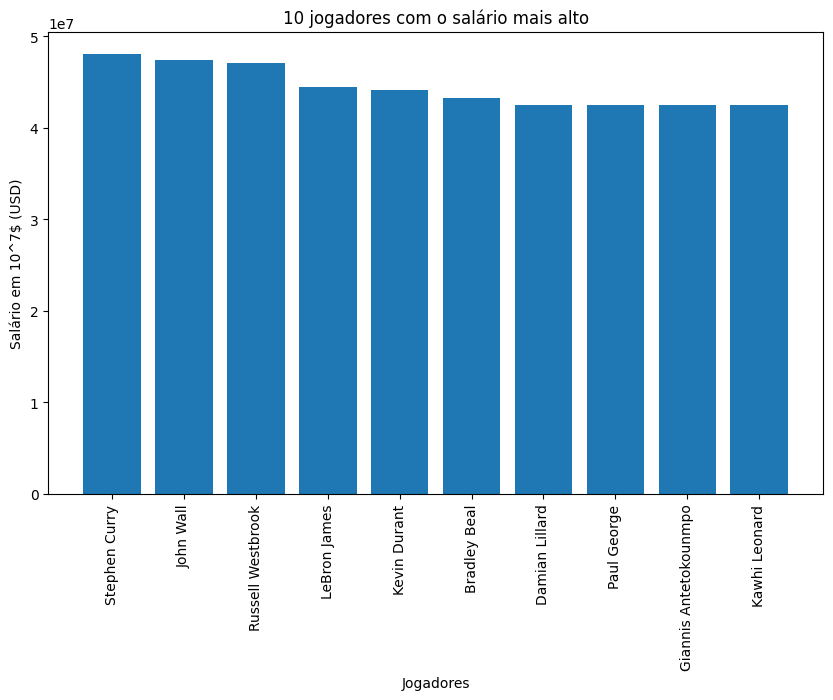

In [11]:
top10_highest_salary(df_nba)

## Number players for each franchise

In [12]:
def count_players_franchise(df):
    
    # count the number of players for each tm and plot it
    df = df['Tm'].value_counts().reset_index()
    df.columns = ['Franchise', 'Number of Players']
    
    # graph with the number of players for each team
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(df['Franchise'], df['Number of Players'])
    
    ax.set_xlabel('Franchise')
    ax.set_ylabel('Number of players')
    ax.set_title('Number of players for each franchise')
    
    plt.xticks(rotation=90)
    plt.show()

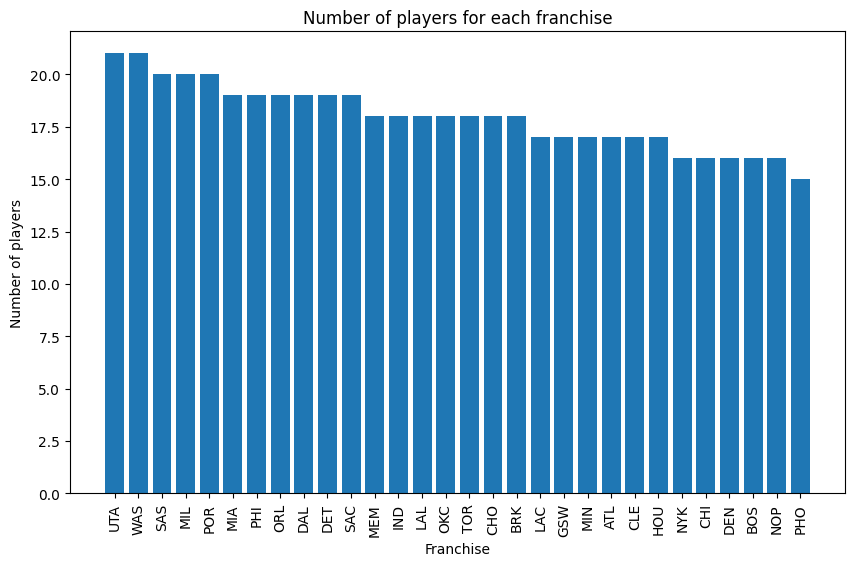

In [13]:
count_players_franchise(df_nba)

## Percentage positions in the legue

In [14]:
def postions_per(df):
    
    # for each postion get percentage in all players and plot it in a pie chart
    
    df = df['Pos'].value_counts().reset_index()
    
    df.columns = ['Position', 'Number of Players']
    
    # graph with the number of players for each team
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.pie(df['Number of Players'], labels=df['Position'], autopct='%1.1f%%', shadow=True, startangle=90)
    
    ax.set_title('Percentage of players for each position')
    
    plt.show()

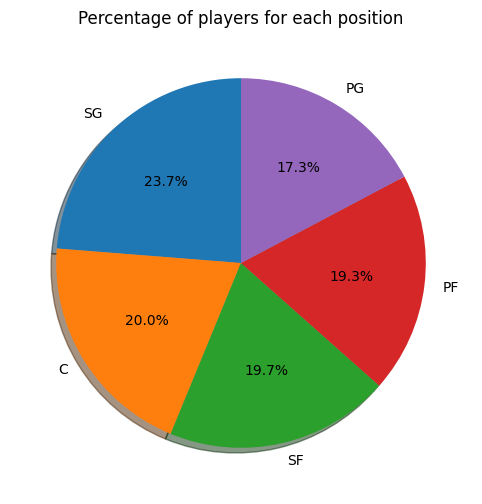

In [15]:
postions_per(df_nba)

## Mean of weight and height distribution for each position 

In [16]:
def mean_weight(df):
    
    # for each position get mean and weight and do 2 plots for each one by position
    
    df = df.groupby('Pos')['Weight'].mean().reset_index()
    
    # graph with the number of players for each team
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(df['Pos'], df['Weight'])
    
    ax.set_xlabel('Position')
    
    ax.set_ylabel('Weight')
    
    ax.set_title('Mean weight for each position')
    
    plt.show()
    
    print(df)

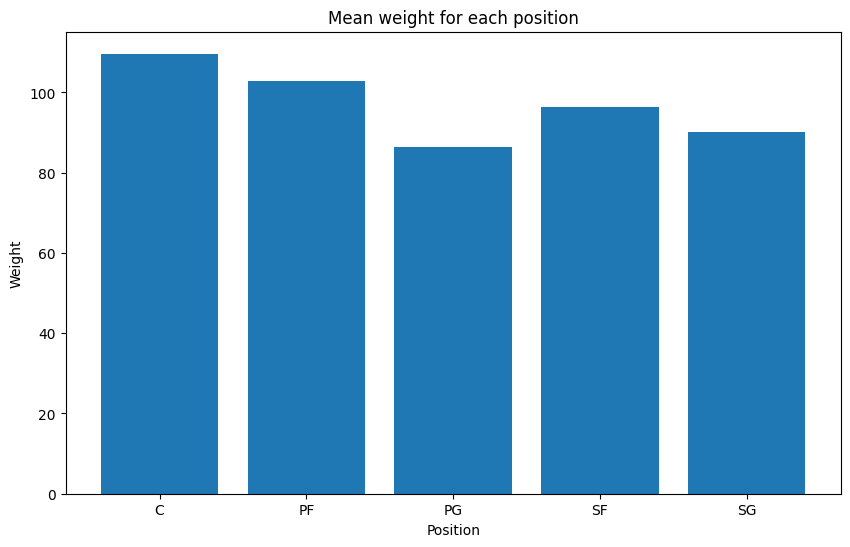

  Pos      Weight
0   C  109.636364
1  PF  102.908046
2  PG   86.480519
3  SF   96.329545
4  SG   90.104348


In [17]:
mean_weight(df_nba)

In [18]:
def mean_height(df):
    
    # for each position get mean and height and do 2 plots for each one by position
    
    df = df.groupby('Pos')['Height'].mean().reset_index()
    
    # graph with the number of players for each team
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(df['Pos'], df['Height'])
    
    ax.set_xlabel('Position')
    
    ax.set_ylabel('Height')
    
    ax.set_title('Mean height for each position')
    
    plt.show()
    
    #and print values for each positon 
    
    print(df)

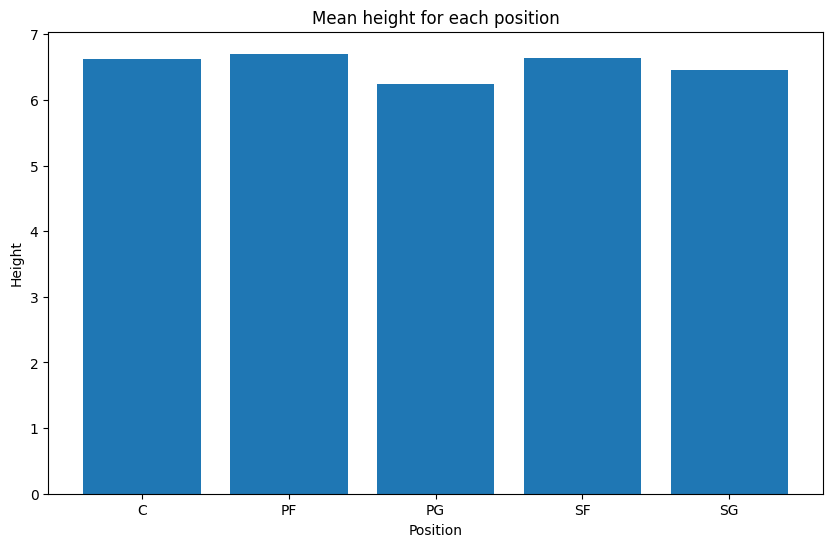

  Pos    Height
0   C  6.620114
1  PF  6.703793
2  PG  6.249481
3  SF  6.639773
4  SG  6.452174


In [19]:
mean_height(df_nba)

## Information of the dataset

In [20]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             539 non-null    object 
 1   Pos                539 non-null    object 
 2   Age                539 non-null    int64  
 3   Tm                 539 non-null    object 
 4   G                  539 non-null    int64  
 5   GS                 539 non-null    int64  
 6   MP                 539 non-null    float64
 7   FG                 539 non-null    float64
 8   FGA                539 non-null    float64
 9   FG%                539 non-null    float64
 10  3P                 539 non-null    float64
 11  3PA                539 non-null    float64
 12  3P%                539 non-null    float64
 13  2P                 539 non-null    float64
 14  2PA                539 non-null    float64
 15  2P%                539 non-null    float64
 16  eFG%               539 non